In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from math import exp

In [52]:
df = pd.read_csv("social_network.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [53]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


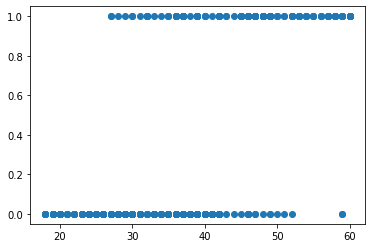

In [54]:
plt.scatter(df["Age"], df["Purchased"])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    df["Age"], df["Purchased"], test_size=0.2, random_state=0)

In [56]:
# Purchased = 1/(1+exp(-(b0+b1*Age)))


# To avoid very high value we normalize near to mean
# to avoid error
def normalize(X):
    return X - X.mean()

def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-b0 - b1*x)) for x in X])

def logistic_regression(X, y):
    X = normalize(X)
    b0 = 0.0
    b1 = 0.0
    l = 0.0001
    iterations = 1000
    n = X.size

    for _ in range(iterations):
        y_pred = predict(X, b0, b1)
        _b0 = -(1/n)*sum((y-y_pred)) # diff wrt b0
        _b1 = -(1/n)*sum(X*(y-y_pred)) # diff wrt b1
        b0 = b0 - l * _b0
        b1 = b1 - l * _b1
    
    return b0, b1

In [57]:
b0, b1 = logistic_regression(X_train, y_train)

print(b0, b1)

-0.011882436779657023 0.11902797249462532


In [58]:
y_pred = predict(X_test, b0, b1)

r2_score(y_test, y_pred)

-2.3832286614555347

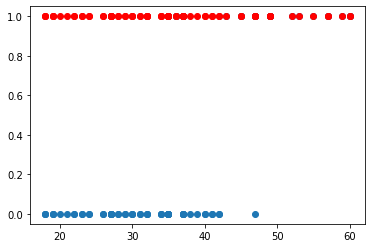

In [59]:
y_pred = [1 if p>=0.5 else 0 for p in y_pred]

# plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")

In [60]:
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1

print("accuracy: ", accuracy/len(y_pred))

accuracy:  0.275
